Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

### The data file credit_card_application.csv contains all the details collected from different customers whose attributes are explained in the table below.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-cly1">Feature name</th>
    <th class="tg-cly1">Explanation</th>
    <th class="tg-cly1">Remarks</th>
  </tr>
  <tr>
    <td class="tg-cly1">ID</td>
    <td class="tg-cly1">client number</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CODE_GENDER'</td>
    <td class="tg-cly1">gender</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNCAR'</td>
    <td class="tg-cly1">Is there a car</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNREALTY'</td>
    <td class="tg-cly1">Is there a property</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CNT_CHILDREN'</td>
    <td class="tg-cly1">Number of children</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'AMTINCOMETOTAL'</td>
    <td class="tg-cly1">Annual income</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEINCOMETYPE'</td>
    <td class="tg-cly1">Income category</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEEDUCATIONTYPE'</td>
    <td class="tg-cly1">education level</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEFAMILYSTATUS'</td>
    <td class="tg-cly1">Marital status</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEHOUSINGTYPE'</td>
    <td class="tg-cly1">Way of living</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_BIRTH'</td>
    <td class="tg-cly1">birthday</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_EMPLOYED'</td>
    <td class="tg-cly1">Start date</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAG_MOBIL'</td>
    <td class="tg-cly1">Is there a mobile phone</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAGWORKPHONE'</td>
    <td class="tg-0lax">Is there a work phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_PHONE'</td>
    <td class="tg-0lax">Is there a phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_EMAIL'</td>
    <td class="tg-0lax">Is there an email</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'OCCUPATION_TYPE'</td>
    <td class="tg-0lax">Occupation</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'CNTFAMMEMBERS'</td>
    <td class="tg-0lax">Family size</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">begin_month</td>
    <td class="tg-0lax">record month</td>
    <td class="tg-0lax">The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on</td>
  </tr>
  <tr>
    <td class="tg-0lax">target</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">1 for high risk and 0 for low risk</td>
  </tr>
</table>

# 1. EDA

In [18]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('credit_card_application.csv')

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

(data_info, data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

(None,
         ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
 0  5008804           M            Y               Y             0   
 1  5008805           M            Y               Y             0   
 2  5008806           M            Y               Y             0   
 3  5008808           F            N               Y             0   
 4  5008809           F            N               Y             0   
 
    AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
 0          427500.0               Working               Higher education   
 1          427500.0               Working               Higher education   
 2          112500.0               Working  Secondary / secondary special   
 3          270000.0  Commercial associate  Secondary / secondary special   
 4          270000.0  Commercial associate  Secondary / secondary special   
 
      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
 0        Civil marriage   Rented

In [19]:
# Summary statistics for numerical columns
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465,0.499422
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207,0.500000
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000,1.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


**Comment**:

Average income of the custoomer is roughly 186,685 dollars with wide variation of 101,789 due to the presence of outliner (max value is 1,575,000)

Everyone have their own mobile device

Customers have averagely 2 persons. Exceptionally there are member with 20 members.

In [20]:
# Check the missing
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)


OCCUPATION_TYPE        30.601039
ID                      0.000000
DAYS_BIRTH              0.000000
CNT_FAM_MEMBERS         0.000000
FLAG_EMAIL              0.000000
FLAG_PHONE              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_MOBIL              0.000000
DAYS_EMPLOYED           0.000000
NAME_HOUSING_TYPE       0.000000
CODE_GENDER             0.000000
NAME_FAMILY_STATUS      0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_INCOME_TYPE        0.000000
AMT_INCOME_TOTAL        0.000000
CNT_CHILDREN            0.000000
FLAG_OWN_REALTY         0.000000
FLAG_OWN_CAR            0.000000
target                  0.000000
dtype: float64

In [21]:
# Check value inside occupation_type
data['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
# missing percentage
data['OCCUPATION_TYPE'].isna().sum() / data.shape[0] * 100

30.601039317580152

**Comment** Only Occupation_type has 11,323 missing value on total 36,457 observations, which is quite high % of missing data.
Some banks may consider job occupation in their process of approving for credit card request or. However due to the missingness is huge and also we have alternative data to be considered instead, which are the annual income and income category, I will decide to drop that columns before encoding data for PCA.

In [23]:
data = data.drop(['OCCUPATION_TYPE'], axis=1)

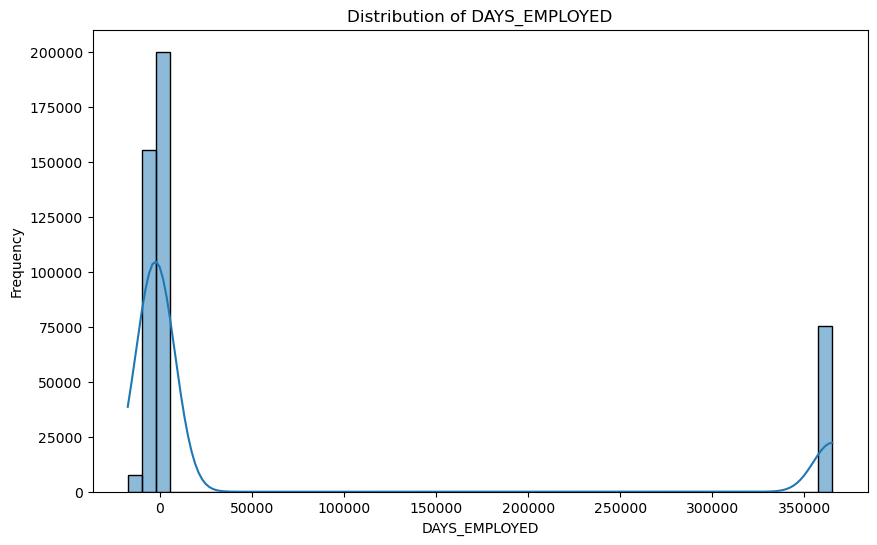

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of DAYS_EMPLOYED
plt.figure(figsize=(10, 6))
sns.histplot(data['DAYS_EMPLOYED'], bins=50, kde=True)
plt.title('Distribution of DAYS_EMPLOYED')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Frequency')
plt.show()


**Comment** There are some extreme value that does not make sense as 350,000 days is almost 999 years, hence removing outliner to clean the data


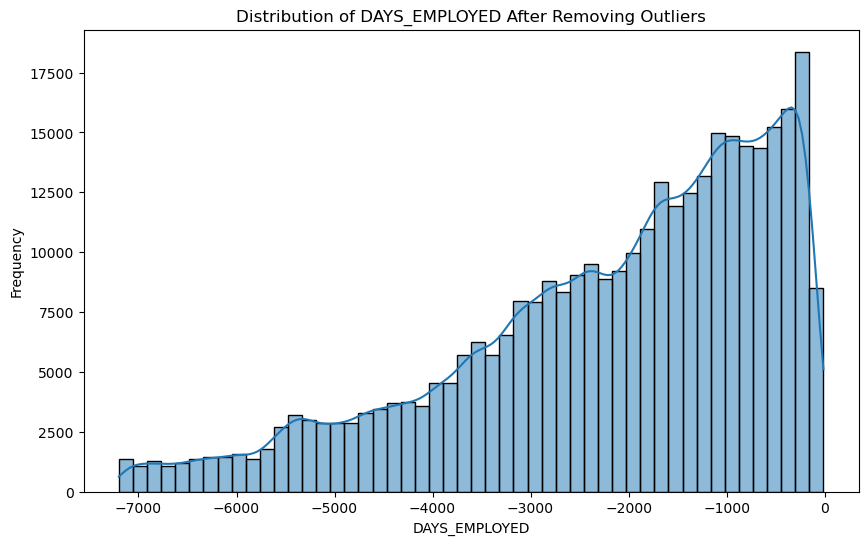

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['DAYS_EMPLOYED'].quantile(0.25)
Q3 = data['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['DAYS_EMPLOYED'] >= lower_bound) & (data['DAYS_EMPLOYED'] <= upper_bound)]

# Plot the distribution of DAYS_EMPLOYED after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['DAYS_EMPLOYED'], bins=50, kde=True)
plt.title('Distribution of DAYS_EMPLOYED After Removing Outliers')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Frequency')
plt.show()

In [26]:
# One hot encode
cat_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
data_encoded = pd.get_dummies(data,
                              columns = cat_columns, drop_first=True)

# Standardize the numerical data
num_columns =['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[num_columns])



In [11]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341257 entries, 0 to 438556
Data columns (total 31 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ID                                                 341257 non-null  int64  
 1   CNT_CHILDREN                                       341257 non-null  int64  
 2   AMT_INCOME_TOTAL                                   341257 non-null  float64
 3   DAYS_BIRTH                                         341257 non-null  int64  
 4   DAYS_EMPLOYED                                      341257 non-null  int64  
 5   FLAG_MOBIL                                         341257 non-null  int64  
 6   FLAG_WORK_PHONE                                    341257 non-null  int64  
 7   FLAG_PHONE                                         341257 non-null  int64  
 8   FLAG_EMAIL                                         341257 non-null  int64 

# 2. Feature reduction with PCA

In [27]:
from sklearn.decomposition import  PCA
import matplotlib.pyplot as plt

# Assuming 'data' is your original Data
# Find optimal of PCA on numerical data
pca_full = PCA()
pca_full.fit(data_scaled)

PCA()

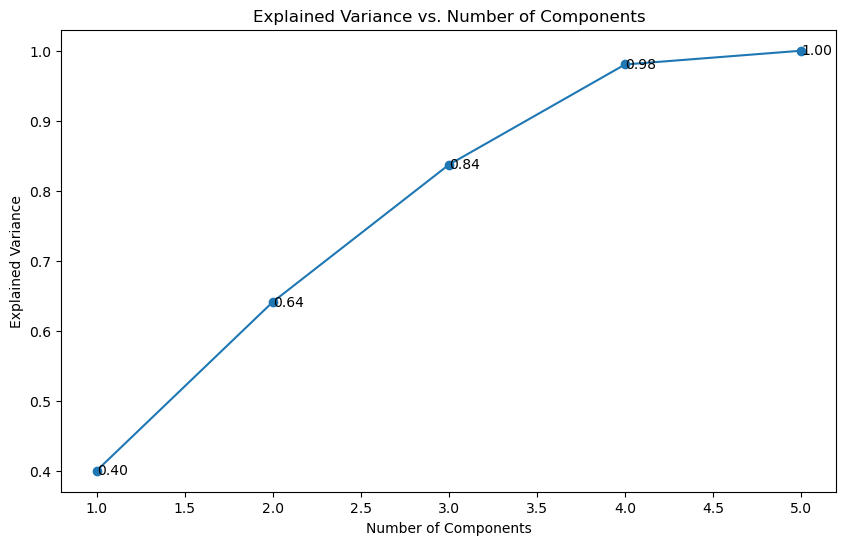

In [13]:
# Plot the number of components vs. explained variance
explained_variances = []
num_components = []
for n_components in range(1, len(num_columns)+1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(data_scaled)
    explained_variances.append(sum(pca.explained_variance_ratio_))
    num_components.append(n_components)

plt.figure(figsize=(10, 6))
plt.plot(num_components, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')

for i, (n, ev) in enumerate(zip(num_components, explained_variances)):
    plt.text(n, ev, f'{ev:.2f}', ha='left', va='center')

plt.show()

**Comment** With 4 principle components, can retain around 86% of variance and lost 14% so I will go with 4 components to train the model. We can increase higher if the bank wanted to minimize the risk to the highest chance, however, It may also has slightly affect their business negatively as they do lost some amount of customer due to very strict conditions.

In [14]:
data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'target'],
      dtype='object')

# 3. Model performance

In [28]:
# Apply PCA to retain the first 4 components
pca_optimal = PCA(n_components=4)
data_pca_optimal = pca_optimal.fit_transform(data_scaled)

# Split the data into training and testing sets
target = data['target']
X_train_optimal, X_test_optimal, y_train_optimal, y_test_optimal = train_test_split(data_pca_optimal,target, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model_optimal = RandomForestClassifier(random_state=42)
rf_model_optimal.fit(X_train_optimal, y_train_optimal)
y_pred_rf_optimal = rf_model_optimal.predict(X_test_optimal)

# Evaluate the Random Forest model using class weights
report_rf = classification_report(y_test_optimal, y_pred_rf_optimal)
cf_matrix_rf = confusion_matrix(y_test_optimal, y_pred_rf_optimal)

print(report_rf)
print(cf_matrix_rf)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     51312
           1       0.50      0.50      0.50     51066

    accuracy                           0.50    102378
   macro avg       0.50      0.50      0.50    102378
weighted avg       0.50      0.50      0.50    102378

[[25630 25682]
 [25520 25546]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Train
xgb_model = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=10)
xgb_model.fit(X_train_optimal, y_train_optimal)
y_pred_xgb = xgb_model.predict(X_test_optimal)

# Evaluate the XGBoost model
report_xgb = classification_report(y_test_optimal, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_optimal, y_pred_xgb)

print(report_xgb)
print(conf_matrix_xgb)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8428
           1       0.00      0.00      0.00       138

    accuracy                           0.98      8566
   macro avg       0.49      0.50      0.50      8566
weighted avg       0.97      0.98      0.98      8566

[[8428    0]
 [ 138    0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**In  both case, the imbalance data effect the model performance where the targeted high risk customer has very small value. We will use SMOTE to fix this.**

In [29]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train_optimal, y_train_optimal)

# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

[(0, 119453), (1, 119453)]


In [30]:
# Train the random forest model
rf = RandomForestClassifier()
smote_model = rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test_optimal)

# Check the model performance
print(classification_report(y_test_optimal, smote_prediction))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     51312
           1       0.50      0.50      0.50     51066

    accuracy                           0.50    102378
   macro avg       0.50      0.50      0.50    102378
weighted avg       0.50      0.50      0.50    102378



In [35]:
# Train the XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=10, random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test_optimal)

# Evaluate the XGBoost model
print("\tAccuracy:", accuracy_score(y_test_optimal, y_pred))
print(classification_report(y_test_optimal, y_pred_xgb))

	Accuracy: 0.502129363730489
              precision    recall  f1-score   support

           0       0.50      0.49      0.49     51312
           1       0.50      0.51      0.50     51066

    accuracy                           0.50    102378
   macro avg       0.50      0.50      0.50    102378
weighted avg       0.50      0.50      0.50    102378



In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import time

# Define model
model = LinearDiscriminantAnalysis()

# Evaluate models with the best hyperparameters found above
lda_best = LinearDiscriminantAnalysis() #leave blank for normal classification
lda_best.fit(X_train_smote, y_train_smote)
y_pred = lda_best.predict(X_test_optimal)

print("LDA Model")
print("\tAccuracy:", accuracy_score(y_test_optimal, y_pred))
print("\tClassification Report:\n", classification_report(y_test_optimal, y_pred))

LDA Model
	Accuracy: 0.5024321631600539
	Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52     51312
           1       0.50      0.47      0.49     51066

    accuracy                           0.50    102378
   macro avg       0.50      0.50      0.50    102378
weighted avg       0.50      0.50      0.50    102378



**Comment**

We will prioritize Recall over Precision since in this case true positive mean identify correct customer with high risk. Standing on the bank point of view, it is more important to prioritize the correct customer with high risk so they would not issue credit card to those who likely not make the payment to the bank and causing loss to the business. We can see the balance of recall between 0 and 1 target in XGboost model, hence, the perfomance of XGBoost model is better than Random Forest model in this case.
